# Energy Economic Analysis - Analyze

Scoring Models
- https://baelearn.uncg.edu/wordpress/ism678/unit-2/unit-2-2-selection-models/unit-2-2-2-numeric-selection-models/2225-weighted-scoring-model/#:~:text=In%20the%20weighted%20scoring%20model,weighted%20score%20for%20each%20project.



In [140]:
import pandas as pd
import os
import time
import pycountry
import math
import numpy as np
import plotly.graph_objects as go

# Read in data

In [141]:
all_data = 'ALL DATA.xlsx'
df = pd.read_excel(all_data, sheet_name='2017 Snapshot', index_col=0)
df_all = pd.read_excel(all_data, sheet_name='ALL DATA', index_col=0)

In [142]:
# Verify main dataframe in correct format
df.head()

,ACCESS_PERC,ACCESS_RURAL_PERC,ACCESS_URBAN_PERC,CAPACITY_HYDRO_MW,CAPACITY_HYDRO_PERC,CAPACITY_HYDRO_YOY,CAPACITY_MW,CAPACITY_NUC_MW,CAPACITY_NUC_PERC,CAPACITY_NUC_YOY,...,SURV_GEN,SURV_GEN_USE,SURV_OUTAGE_DUR,SURV_OUTAGE_LOSS_PERC,SURV_OUTAGE_PERC,SURV_OUTAGE_QTY,SURV_SHIP,SURV_TRANS,SURV_WATER_PERC,SURV_WATER_QTY
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,97.700000,97.091973,99.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,38.3,3.8,9.6,70.4,11.5,1.7,42.1,8.9,0.9
AGO,41.962894,NaN,71.886459,2420.0,64.3,90.6,3764.4,0.0,0.0,NaN,...,79.0,27.3,13.5,12.6,87.7,4.7,3.3,25.3,46.1,2.4
ALB,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.4,11.9,1.3,1.9,58.7,1.5,1.4,10.7,10.8,0.1
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outlier Analysis

In [143]:
def outlierReport(s):
    """
    DESCRIPTION: Identify outliers in a series of data. NaNs are skipped.
    INPUT: 
        s = pandas series for analysis
    OUTPUT: 
        outliers = list of countries that have outliers
    """
    outliers = []
    stats = s.describe()
    iqr = stats['75%'] - stats['25%']
    limit_max = stats['75%'] + iqr * 1.5
    limit_min = stats['25%'] - iqr * 1.5
    for idx, val in enumerate(s):
        if val > limit_max or val < limit_min:
            outliers.append(df.index[idx])
    return outliers

In [144]:
# List all countries that do not have outliers
total = 0
for i in df.columns:
    if len(outlierReport(df[i])) == 0:
        total+=1
        print(i)
print('Number of countries with no outliers: ', total)

CAPACITY_HYDRO_PERC
CAPACITY_THERMAL_PERC
POP_RURAL_PERC
POP_URBAN_PERC
RISE_ACCESS
RISE_EA4
RISE_EA5
RISE_EA6
RISE_EA7
RISE_EE1
RISE_EE10
RISE_EE11
RISE_EE12
RISE_EE13
RISE_EE2
RISE_EE5
RISE_EE6
RISE_EE7
RISE_EE8
RISE_EE9
RISE_EFFICIENCY
RISE_OVERALL
RISE_RE2
RISE_RE3
RISE_RE4
RISE_RE5
RISE_RE6
RISE_RE7
RISE_RENEWABLES
RI_COUNTRY
RI_LOGISTIC
RI_OPERATIONAL
RI_TRADE
SURV_ELEC_CONSTRAINT
SURV_GEN
SURV_OUTAGE_PERC
Number of countries with no outliers:  36


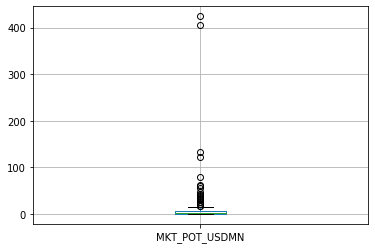

In [145]:
i=50
display(df.boxplot(column=df.columns[i]))

# Data Exploration

### What is the market size of the energy sector in a given country? 

In [146]:
df_cap = df['MKT_POT_USDMN']
title = 'TES Market Potential'

In [147]:
df_cap.sort_values(ascending=False).head(10)

Country Code
USA    424.121
CHN    405.692
IND    132.680
JPN    121.381
DEU     79.232
BRA     62.563
GBR     60.907
FRA     55.551
MEX     46.250
KOR     43.781
Name: MKT_POT_USDMN, dtype: float64

In [148]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    #colorbar_ticksuffix = '',
    colorbar_title = 'Millions',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### How developed is a country’s electrical infrastructure? 

In [149]:
df_cap = df['CONSUME_KWHPP'].drop(['ISL', 'NOR'])
title = 'Electricity Consumption Per Person'

In [150]:
df_cap.sort_values(ascending=False).head(10)

Country Code
BHR    19105.1
FIN    15071.6
KWT    14920.2
QAT    14772.1
CAN    13864.2
SWE    13378.4
ARE    12091.1
USA    11825.3
KOR    10015.6
AUS     9381.3
Name: CONSUME_KWHPP, dtype: float64

In [151]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    #colorbar_ticksuffix = '',
    colorbar_title = 'kWh',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### How often do electrical outages occur?

In [152]:
df_cap = df['SURV_OUTAGE_QTY'].drop(['PAK'])
title = 'Electrical Outages Per Month'

In [153]:
df_cap.sort_values(ascending=False).head(10)

Country Code
BGD    64.5
PNG    41.9
IRQ    40.9
YEM    38.8
NGA    32.8
CAF    29.0
BEN    28.0
NER    22.0
COG    21.5
GMB    21.1
Name: SURV_OUTAGE_QTY, dtype: float64

In [154]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    #colorbar_ticksuffix = '',
    colorbar_title = 'Number of Outages',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### What is the price of electricity in a given country?

In [155]:
df_cap = df['PRICE_RES_USDKWH']#.drop(['PAK'])
title = 'Price of Electricity'

In [156]:
df_cap.sort_values(ascending=False).head(10)

Country Code
MEX    0.79
ESP    0.68
BEL    0.62
DEU    0.57
ARG    0.56
IRL    0.50
AUT    0.48
PRT    0.47
ISL    0.45
DNK    0.45
Name: PRICE_RES_USDKWH, dtype: float64

In [157]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_ticksuffix = '',
    colorbar_title = 'Price',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### What is the risk of doing business in a country?

In [158]:
df_cap = df['RI_COUNTRY']#.drop(['PAK'])
title = 'Country Risk Scores'

In [159]:
df_cap.sort_values(ascending=True).head(10)

Country Code
SSD    20.7
YEM    23.9
SYR    25.1
CAF    25.5
TCD    29.1
AFG    29.7
SOM    29.9
LBY    30.6
COD    30.9
HTI    31.6
Name: RI_COUNTRY, dtype: float64

In [160]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_ticksuffix = '',
    colorbar_title = 'Score',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### What is the wealth of a country and its citizens?

In [161]:
df_cap = df['RGDP_PP'].drop(['MMR', 'LIE', 'LUX', 'NOR'])
title = 'GDP Per Capita'

In [162]:
df_cap.sort_values(ascending=False).head(10)

Country Code
BMU    84038.6
IRL    73218.1
CYM    72400.6
AUS    67752.1
QAT    64883.7
DNK    63212.9
SWE    62235.3
CHE    61484.1
SGP    58890.3
MAC    56839.0
Name: RGDP_PP, dtype: float64

In [163]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_ticksuffix = '',
    colorbar_title = 'Score',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### How do countries compare in terms of pollution?

In [164]:
df_cap = df['CO2_EMISS_TONSPP'].drop(['QAT', 'CUW', 'TTO'])
title = 'CO2 Emissions in Tons Per Capita'

In [165]:
df_cap.sort_values(ascending=False).head(10)

Country Code
KWT    25.849229
BHR    23.455406
ARE    22.939606
BRN    22.229178
SXM    19.461324
SAU    19.440666
LUX    17.362121
USA    16.507266
NAC    16.370802
NCL    16.005932
Name: CO2_EMISS_TONSPP, dtype: float64

In [166]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_ticksuffix = '',
    colorbar_title = 'Tons Per Capita',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### How do countries compare in terms of renewable energy generation?

In [167]:
df_cap = df['GEN_RENEW_KWHPP'].drop(['ISL'])
title = 'Renewable Electricity Generation Per Capita'

In [168]:
df_cap.sort_values(ascending=False).head(10)

Country Code
DNK    3946.252
SWE    3189.938
FIN    3117.373
NZL    2653.958
DEU    2456.145
URY    1713.883
IRL    1642.778
PRT    1620.922
ESP    1471.357
AUT    1415.492
Name: GEN_RENEW_KWHPP, dtype: float64

In [169]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_ticksuffix = '',
    colorbar_title = 'kWh/pp',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()

### How committed is a country to renewable energy expansion and investment?

In [170]:
df_cap = df['RISE_OVERALL']#.drop(['ISL'])
title = 'RISE Scores'

In [171]:
df_cap.sort_values(ascending=False).head(10)

Country Code
DEU    93.32
GBR    91.27
ITA    90.46
CAN    89.56
KOR    89.25
IRL    88.37
NLD    87.74
SVK    87.70
PRT    87.30
HUN    87.23
Name: RISE_OVERALL, dtype: float64

In [172]:
fig_cap = go.Figure(data=go.Choropleth(
    locations = df_cap.index,
    z = df_cap,
    text = df_cap.index,
#    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_ticksuffix = '',
    colorbar_title = 'Score',
))

fig_cap.update_layout(
    title_text=title,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig_cap.show()